# Bibliotecas

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Customers

In [56]:
customers = pd.read_csv('olist_customers_dataset.csv', sep = ',')
customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [57]:
customers.shape

(99441, 5)

### Geolocation

In [58]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep = ',')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [59]:
geolocation.shape

(1000163, 5)

### Customers + Geolocation

In [60]:
# verificar se o shape(customer) manteve o mesmo
first = pd.merge(customers, geolocation, how = 'inner', left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
first.filter(['customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng'])

,customer_city,customer_state,geolocation_lat,geolocation_lng
0,franca,SP,-20.509897,-47.397866
1,franca,SP,-20.497396,-47.399241
2,franca,SP,-20.510459,-47.399553
3,franca,SP,-20.480940,-47.394161
4,franca,SP,-20.515413,-47.398194
...,...,...,...,...
15083450,aparecida de goiania,GO,-16.821866,-49.244027
15083451,aparecida de goiania,GO,-16.821866,-49.244027
15083452,aparecida de goiania,GO,-16.822945,-49.244615
15083453,passo fundo,RS,-28.226596,-52.467505


In [61]:
first.shape

(15083455, 10)

### Order Items

In [62]:
order_items = pd.read_csv('olist_order_items_dataset.csv', sep = ',')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
order_items.shape

(112650, 7)

### Payments

In [64]:
order_payment = pd.read_csv('olist_order_payments_dataset.csv', sep = ',')
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [65]:
order_payment.shape

(103886, 5)

### Reviews

In [66]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [67]:
order_reviews.shape

(99224, 7)

### Orders

In [68]:
orders = pd.read_csv('olist_orders_dataset.csv', sep = ',')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [69]:
orders.shape

(99441, 8)

### Products

In [70]:
products = pd.read_csv('olist_products_dataset.csv', sep = ',')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [71]:
products.shape

(32951, 9)

### Sellers

In [72]:
sellers = pd.read_csv('olist_sellers_dataset.csv', sep = ',')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [73]:
sellers.shape

(3095, 4)

### Product Category

In [74]:
products_category = pd.read_csv('product_category_name_translation.csv', sep = ',')
products_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [75]:
products_category.shape

(71, 2)

### Respondendo algumas perguntas

#### 1 - Qual produto traz mais receita?

In [76]:
# Aqui foi feito um merge com dois dataset
# products + order_items

prod_order_merge = pd.merge(products, order_items, how = 'left', on = 'product_id')
prod_order_merge.shape

(112650, 15)

In [77]:
# Filtro pegando apenas as colunas de interesse
# Product_id + product_category_name + price

top5 = prod_order_merge.filter(['product_id', 'product_category_name', 'price']).sort_values(by = 'price', ascending = False).head()
top5

,product_id,product_category_name,price
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,6735.0
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,6729.0
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,6499.0
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,4799.0
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,4690.0


Text(0.5, 0, 'Preço')

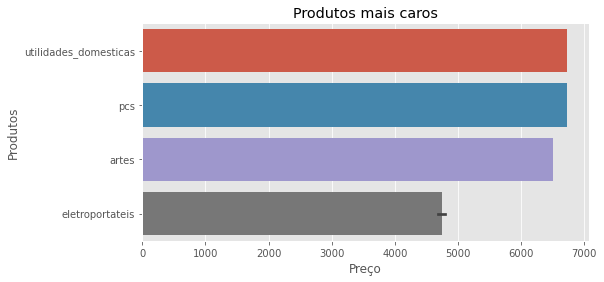

In [78]:
# Gráfico dos top 5 produtos mais caros

plt.figure(figsize = (8,4))
plt.title("Produtos mais caros")
sns.barplot(x = top5.price, y = top5.product_category_name)
plt.ylabel("Produtos")
plt.xlabel("Preço")

##### No gráfico acima podemos ver que "utilidades domésticas" é categoria que traz o produto MAIS CARO

In [79]:
# Agrupamento das categorias de produtos para identificar qual produto traz mais receita

top5receita = prod_order_merge.groupby('product_category_name').sum('price').sort_values(by = 'price', ascending = False).head().reset_index()

# Filtro pegando apenas as colunas de interesse
# Product_category_name + price
top5receita.filter(['product_category_name', 'price'])

,product_category_name,price
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32


Text(0, 0.5, 'Categorias')

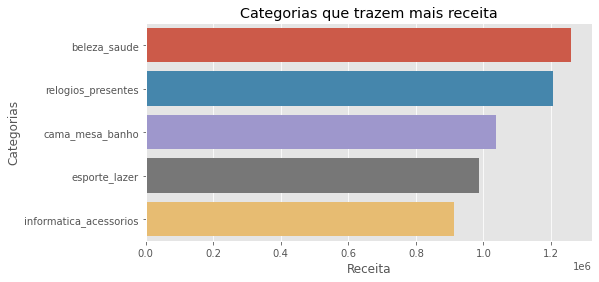

In [80]:
# Gráfico mostrando as top 5 categorias que trazem mais receita

plt.figure(figsize = (8,4))
plt.title("Categorias que trazem mais receita")
sns.barplot(x = top5receita.price, y = top5receita.product_category_name)
plt.xlabel("Receita")
plt.ylabel("Categorias")

In [81]:
# Outra forma de gráfico utilizando o pandas

#top5receita['price'].plot.barh(title = "TOP 5 produtos que trazem mais receitas", edgecolor = 'black', color = ['#073b4c', '#118ab2', '#06d6a0', '#ffd166', '#ef476f'])

##### No gráfico acima podemos ver que "beleza/saúde" é a categoria que traz MAIS RECEITA

In [82]:
top5maisvendidos = prod_order_merge['product_category_name'].value_counts().sort_values(ascending = False).head()
top5maisvendidos

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
Name: product_category_name, dtype: int64

<AxesSubplot:title={'center':'TOP 5 produtos mais vendidos'}>

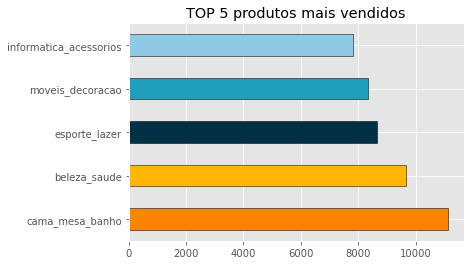

In [83]:
# Plot utilizando o pandas
top5maisvendidos.plot.barh(title = 'TOP 5 produtos mais vendidos', edgecolor = 'black', color = ['#fb8500','#ffb703','#023047','#219ebc','#8ecae6'])

##### No gráfico acima podemos ver que "cama/mesa/banho" é a categoria que traz uma MAIOR QUANTIDADE DE VENDA

##### O que podemos entender a respeito disso?

##### Por mais que "cama/mesa/banho" seja a categoria que mais vende, não é a categoria que mais arrecada.

#### 2 - Qual região traz mais receita?

###### Tabelas a serem utilizadas: (customers, orders, order_items)

In [84]:
# Aqui estamos fazendo um merge com 3 datasets
# Customers + orders (primeiro)
# (Customers + orders) + order_items (segundo)

customers_orders = pd.merge(customers, orders, how = 'left', on = 'customer_id')

customers_orders_items_tmp = pd.merge(customers_orders, order_items, how = 'left', on = 'order_id')

# Filtro com as colunas de interesse
# Customer_id + Customer_city + price
cost_ord_it_merge = customers_orders_items_tmp.filter(['customer_id', 'customer_city', 'price'])

In [85]:
customers.shape, orders.shape, customers_orders.shape, order_items.shape, customers_orders_items_tmp.shape, cost_ord_it_merge.shape

((99441, 5), (99441, 8), (99441, 12), (112650, 7), (113425, 18), (113425, 3))

In [86]:
# Verificando os valores nulos
cost_ord_it_merge.isnull().sum()

customer_id        0
customer_city      0
price            775
dtype: int64

In [87]:
# Deletando os valores nulos e usando o 'inplace = True' para apagar permanentemente
cost_ord_it_merge.dropna(inplace = True)

In [88]:
cost_ord_it_merge.shape

(112650, 3)

In [89]:
# Agrupamento das regiões e soma dos preços para identificar as regiões que mais trazem receitas
fifth_regioes = cost_ord_it_merge.groupby('customer_city').sum('price').sort_values(by = 'price', ascending = False).head().reset_index()
fifth_regioes

,customer_city,price
0,sao paulo,1914924.54
1,rio de janeiro,992538.86
2,belo horizonte,355611.13
3,brasilia,301920.25
4,curitiba,211738.06


Text(0, 0.5, 'Regiões')

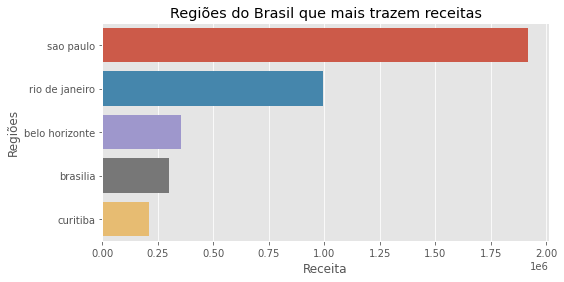

In [90]:
# Plot
plt.figure(figsize=(8,4))
plt.title("Regiões do Brasil que mais trazem receitas")
sns.barplot(x = fifth_regioes.price, y = fifth_regioes.customer_city)
plt.xlabel("Receita")
plt.ylabel("Regiões")

In [91]:
# Outro modelo de gráfico utilizando o pandas
# fifth_regioes['price'].head().plot.barh(title = 'TOP 5 regiões que mais trazem receita', edgecolor = 'black', color = ['#22577a', '#38a3a5', '#57cc99', '#80ed99', '#c7f9cc'])

##### No gráfico acima podemos ver que "São Paulo" é a região que mais traz receita

#### 3 - Qual a média de preço de cada categoria?

In [92]:
# Aqui estamos fazendo um merge com 2 datasets
# Order_items + products
orders_products = pd.merge(order_items, products, how = 'left', on = 'product_id')
orders_products.shape

(112650, 15)

In [93]:
# Filtro das colunas que serão utilizadas
# Product_category_name + price
orders_products_tmp = orders_products.filter(['product_category_name', 'price'])

In [94]:
# Agrupamento das categorias dos produtos e media dos preços
orders_products = orders_products_tmp.groupby('product_category_name').mean().sort_values('price', ascending = False).head(10).reset_index()
orders_products

,product_category_name,price
0,pcs,1098.340542
1,portateis_casa_forno_e_cafe,624.285658
2,eletrodomesticos_2,476.124958
3,agro_industria_e_comercio,342.124858
4,instrumentos_musicais,281.616000
5,eletroportateis,280.778468
6,portateis_cozinha_e_preparadores_de_alimentos,264.568667
7,telefonia_fixa,225.693182
8,construcao_ferramentas_seguranca,208.992371
9,relogios_presentes,201.135984


Text(0, 0.5, 'Categorias')

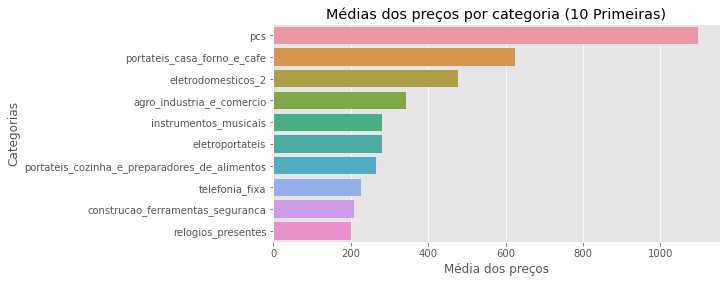

In [95]:
# Plot 
plt.figure(figsize = (8,4))
plt.title("Médias dos preços por categoria (10 Primeiras)")
sns.barplot(x = orders_products.price, y = orders_products.product_category_name)
plt.xlabel("Média dos preços")
plt.ylabel("Categorias")


In [96]:
# Outro modelo de gráfico utilizando o pandas
# orders_products['price'].head().plot.barh(title = 'TOP 5 das categorias com médias mais altas', edgecolor = 'black', color = ['#4cc9f0', '#4361ee', '#3a0ca3', '#7209b7', '#f72585'])

##### No gráfico acima podemos ver que a categoria de "pcs" é categoria que tem a média mais elevada em seus preços

#### 4 - Onde estão localizados os top 10 clientes?

In [97]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [98]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [99]:
# Aqui estamos fazendo um merge com 2 datasets
# Customers + Orders
cost_ord_merge_tmp = pd.merge(customers, orders, how = 'left', on = 'customer_id')
cost_ord_merge_tmp.shape

(99441, 12)

In [100]:
cost_ord_merge_tmp.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [101]:
# Filtro das colunas que serão utilizadas
# Contagem da quantidade de compras feitas pelos usuários
# Seleciona os 10 primeiros
# Reseta o index
cost_ord_merge = cost_ord_merge_tmp.filter(['customer_unique_id', 'customer_city']).value_counts().head(10).reset_index()

In [102]:
# Renomear a coluna que apresenta a contagem
cost_ord_merge.rename(columns = {0: 'Value'}, inplace = True)

<AxesSubplot:title={'center':'Regiões que se encontram os TOP 10 clientes'}, xlabel='Value', ylabel='customer_city'>

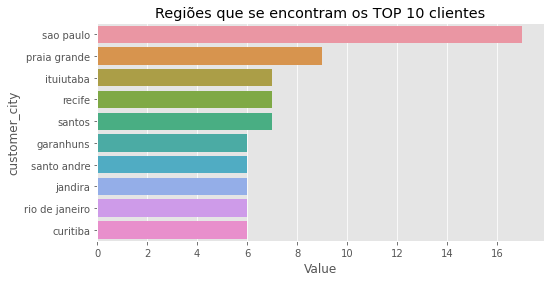

In [106]:
# Plot
plt.figure(figsize = (8,4))
plt.title("Regiões que se encontram os TOP 10 clientes")
sns.barplot(x = cost_ord_merge.Value, y = cost_ord_merge.customer_city)

In [107]:
# Plot utilizando o pandas
# cost_ord_merge.plot.barh(x = 'customer_city', y = 'Value')

##### No gráfico acima podemos ver que a cidade de São Paulo é a cidade que tem mais clientes compradores.